In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as snd

import cmocean

from skimage.morphology import disk
from skimage.draw import line

In [2]:
rng = np.random.default_rng(42)

dim_x = 1000
dim_y = 800
Nspots = 15

spot_intensity = 100.
spot_radius = 1
spot = disk(spot_radius) * spot_intensity

main_spot_intensity = 200.
main_spot_radius = 3
main_spot = disk(main_spot_radius) * main_spot_intensity

line_intensity = 50.

smoothing = 10.

imshow_kwargs = {
    "vmin": 0,
    "vmax": 8,
    "interpolation": "bicubic",
    "aspect": "equal",
    "cmap": cmocean.cm.ice,
}

text_base_kwargs = {
    "x": dim_x // 2,
    "ha": "center",
    "va": "top",
    "color": "w",
    "alpha": 0.6,
    "fontfamily": "Rachana",
}

text_kwargs = {**text_base_kwargs, **{"y": 30, "fontsize": 50}}
text2_kwargs = {**text_base_kwargs, **{"y": 100, "fontsize": 30}}
text3_kwargs = {**text_base_kwargs, **{"y": 150, "fontsize": 20}}

dpi = 100
figsize = (dim_x // dpi, dim_y // dpi)

In [3]:
def render_constellation(signs):
    # Background noise
    constellation = rng.normal(size=(dim_y, dim_x))**2

    # Locations of background stars
    spots_x = rng.integers(low=spot_radius+1, high=dim_x-spot_radius-1, size=Nspots)
    spots_y = rng.integers(low=spot_radius+1, high=dim_y-spot_radius-1, size=Nspots)

    # Add random background stars
    for x, y in zip(spots_x, spots_y):
        x_slice = slice(x - spot_radius - 1, x + spot_radius)
        y_slice = slice(y - spot_radius - 1, y + spot_radius)
        constellation[y_slice, x_slice] = spot
        
    # Check if one ore multiple signs are passed
    if type(signs) == np.ndarray:
        signs = [signs]
    
    for sign in signs:
        # Add connectors
        for star0, star1 in zip(sign[:-1], sign[1:]):
            rr, cc = line(star0[1], star0[0], star1[1], star1[0])
            constellation[rr, cc] = line_intensity

        # Add stars in constellation
        for x, y in sign:
            x_slice = slice(x - main_spot_radius - 1, x + main_spot_radius)
            y_slice = slice(y - main_spot_radius - 1, y + main_spot_radius)
            constellation[y_slice, x_slice] = main_spot

    # Smooth everything
    constellation = snd.gaussian_filter(constellation, sigma=smoothing)
    
    return constellation

# Aries / Earthquake Early Warning

<IPython.core.display.Javascript object>


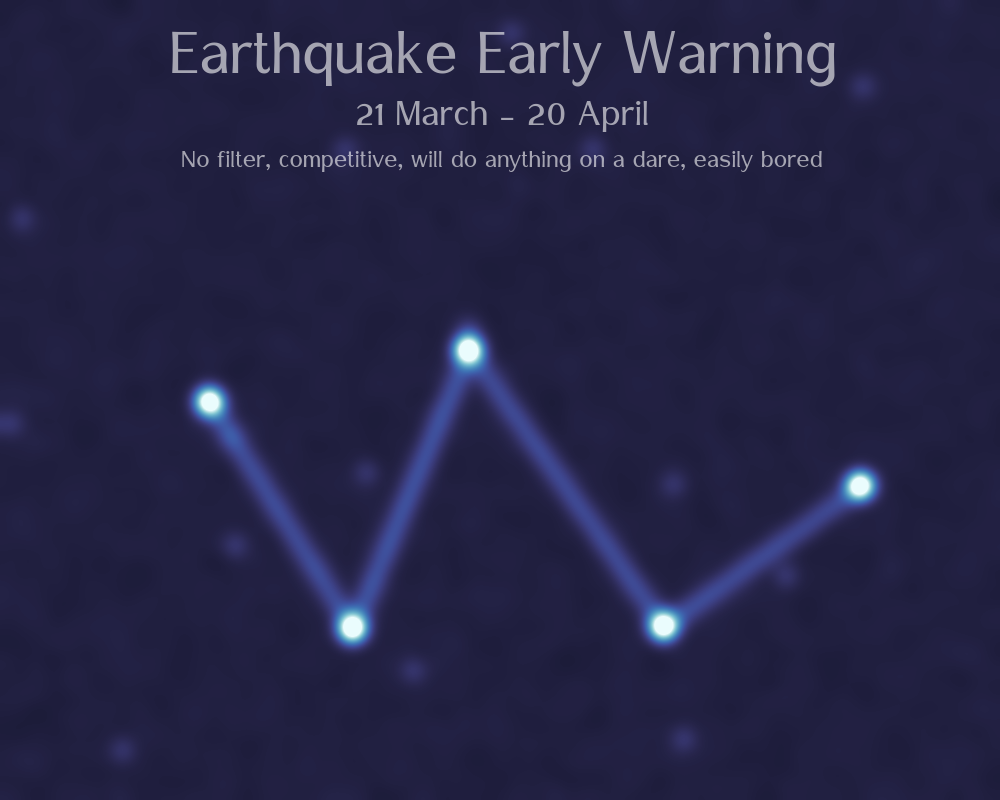

In [4]:
# Constellation structure
sign = np.array([
    [210, 402],
    [353, 629],
    [469, 350],
    [664, 627],
    [861, 486],
])

# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Earthquake Early Warning", **text_kwargs)
plt.text(s="21 March - 20 April", **text2_kwargs)
plt.text(s="No filter, competitive, will do anything on a dare, easily bored", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("EEW.png")
plt.show()

# Tauros / Raspberry Shake

<IPython.core.display.Javascript object>


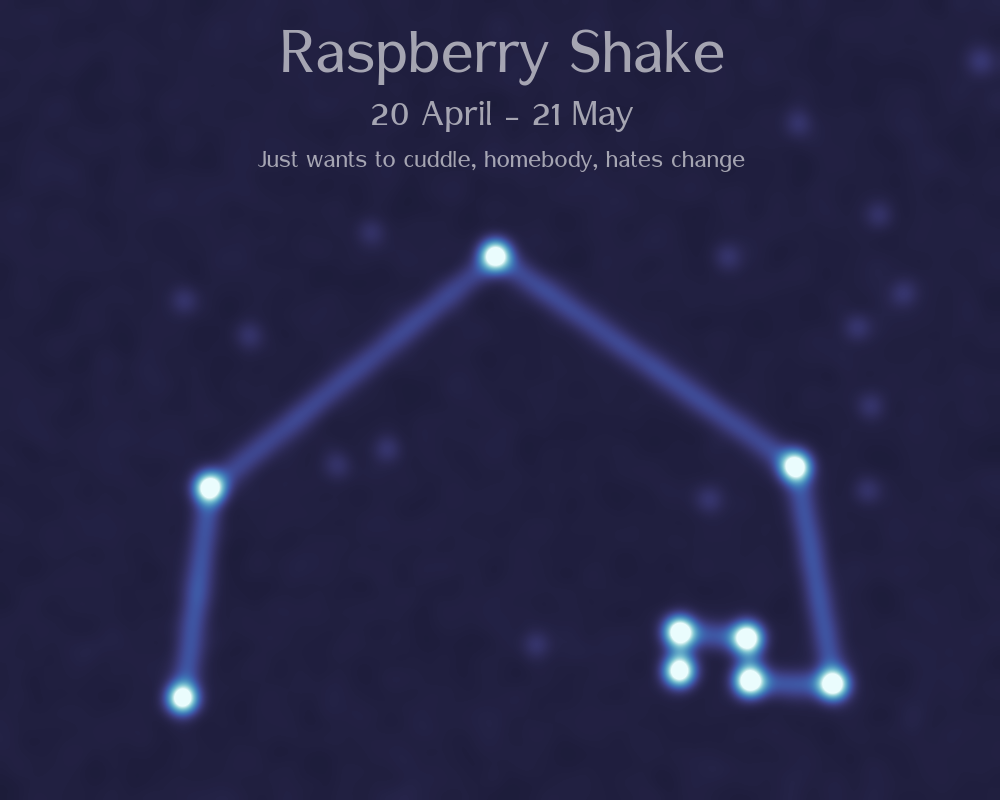

In [5]:
# Constellation structure
sign = np.array([
    [183, 699],
    [210, 488],
    [496, 256],
    [796, 467],
    [834, 685],
    [750, 682],
    [748, 638],
    [680, 632],
    [680, 672],
])

# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Raspberry Shake", **text_kwargs)
plt.text(s="20 April - 21 May", **text2_kwargs)
plt.text(s="Just wants to cuddle, homebody, hates change", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("Raspberry.png")
plt.show()

# Gemini / ObsPy

<IPython.core.display.Javascript object>


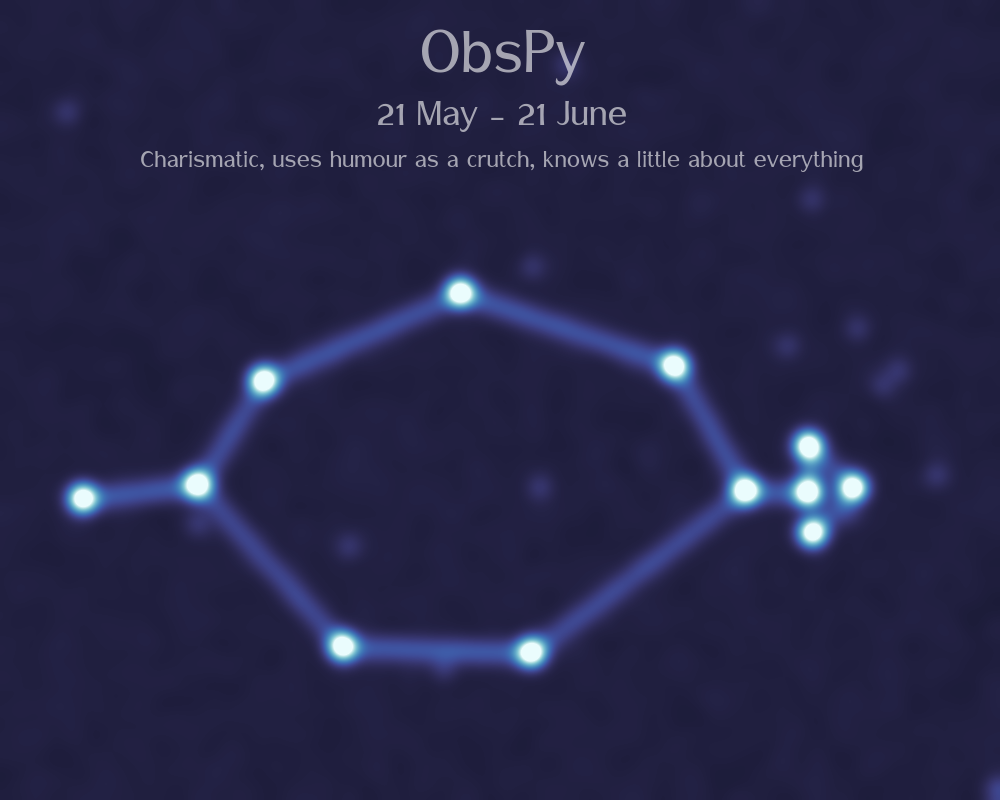

In [6]:
# Constellation structure
sign = np.array([
    [83, 499],
    [198, 485],
    [264, 381],
    [461, 293],
    [675, 366],
    [746, 491],
    [809, 493],
    [809, 446],
    [854, 488],  
    [813, 533],
])

sign2 = np.array([
    [198, 485],
    [343, 647],
    [532, 653],
    [746, 491],
])

# Render constellation
constellation = render_constellation([sign, sign2])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="ObsPy", **text_kwargs)
plt.text(s="21 May - 21 June", **text2_kwargs)
plt.text(s="Charismatic, uses humour as a crutch, knows a little about everything", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("ObsPy.png")
plt.show()

# Cancer / Short-period sensor

<IPython.core.display.Javascript object>


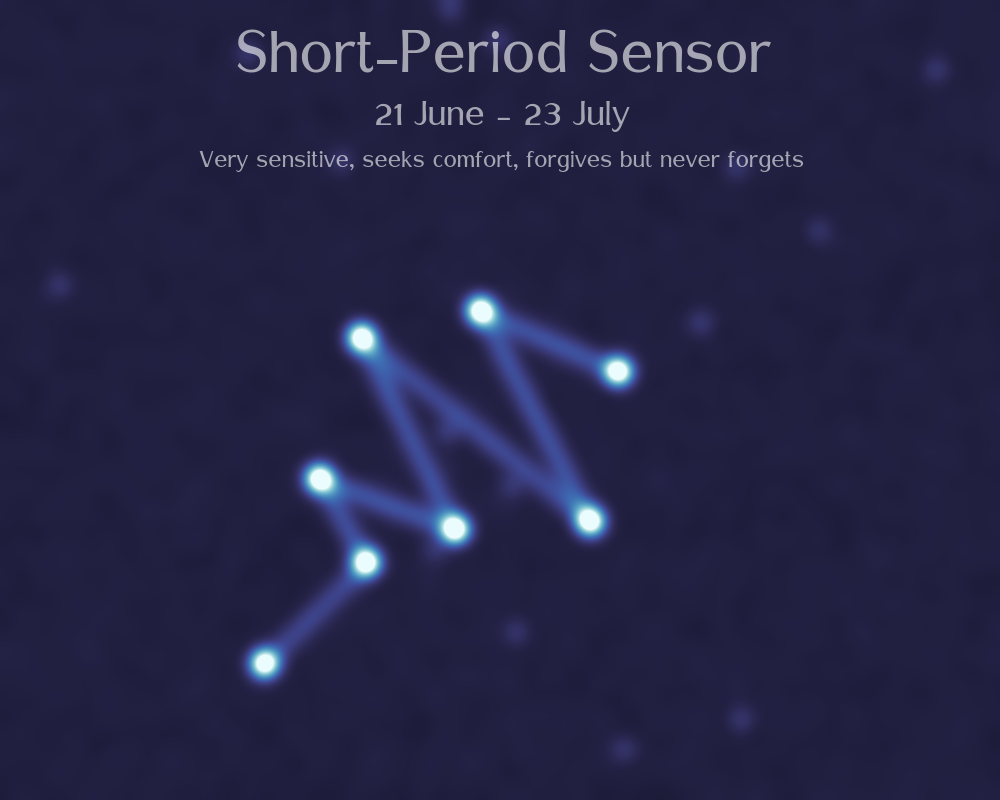

In [7]:
# Constellation structure
sign = np.array([
    [265, 664],
    [367, 563],
    [320, 479],
    [456, 530],
    [362, 338],
    [591, 522],
    [481, 311],
    [619, 372],
])

# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Short-Period Sensor", **text_kwargs)
plt.text(s="21 June - 23 July", **text2_kwargs)
plt.text(s="Very sensitive, seeks comfort, forgives but never forgets", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("SPS.png")
plt.show()

# Leo / Machine Learning

<IPython.core.display.Javascript object>


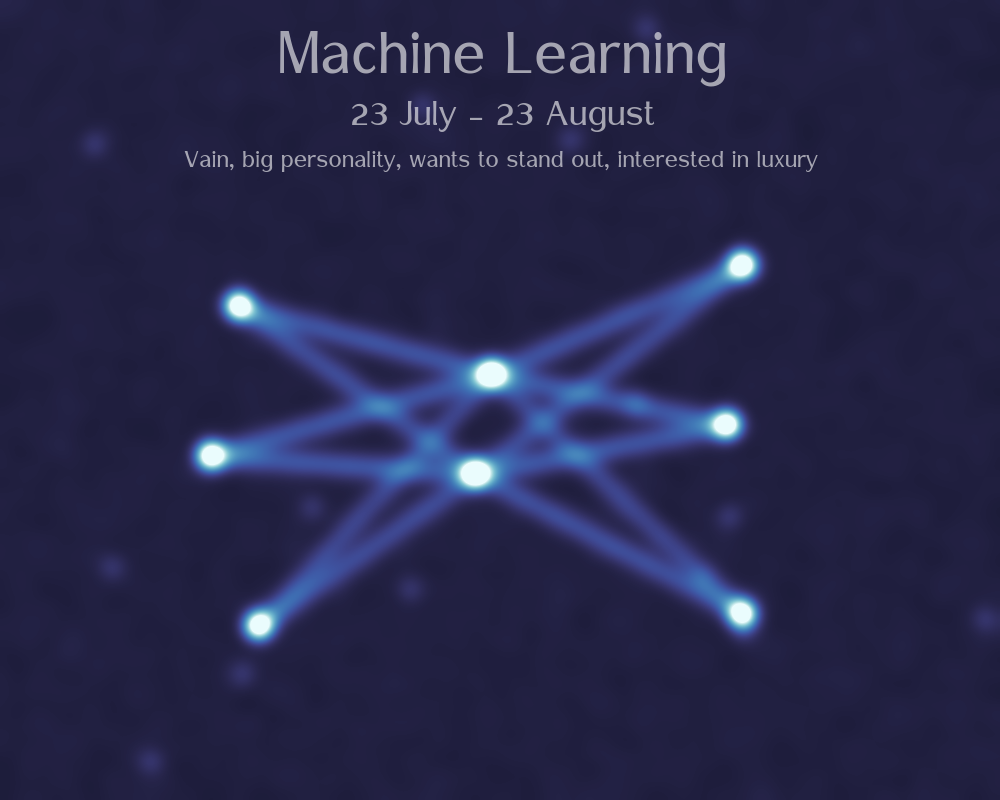

In [8]:
# Constellation structure

# Left column
sign1 = np.array([[239, 306], [492, 374]])
sign2 = np.array([[211, 456], [492, 374]])
sign3 = np.array([[259, 626], [492, 374]])

sign4 = np.array([[239, 306], [476, 474]])
sign5 = np.array([[211, 456], [476, 474]])
sign6 = np.array([[259, 626], [476, 474]])

# Right column
sign7 = np.array([[492, 374], [743, 265]])
sign8 = np.array([[492, 374], [728, 425]])
sign9 = np.array([[492, 374], [743, 614]])

sign10 = np.array([[476, 474], [743, 265]])
sign11 = np.array([[476, 474], [728, 425]])
sign12 = np.array([[476, 474], [743, 614]])

# Render constellation
constellation = render_constellation([
    sign1, sign2, sign3, sign4, sign5, sign6, 
    sign7, sign8, sign9, sign10, sign11, sign12
])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Machine Learning", **text_kwargs)
plt.text(s="23 July - 23 August", **text2_kwargs)
plt.text(s="Vain, big personality, wants to stand out, interested in luxury", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("ML.png")
plt.show()

# Virgo / FORTRAN

<IPython.core.display.Javascript object>


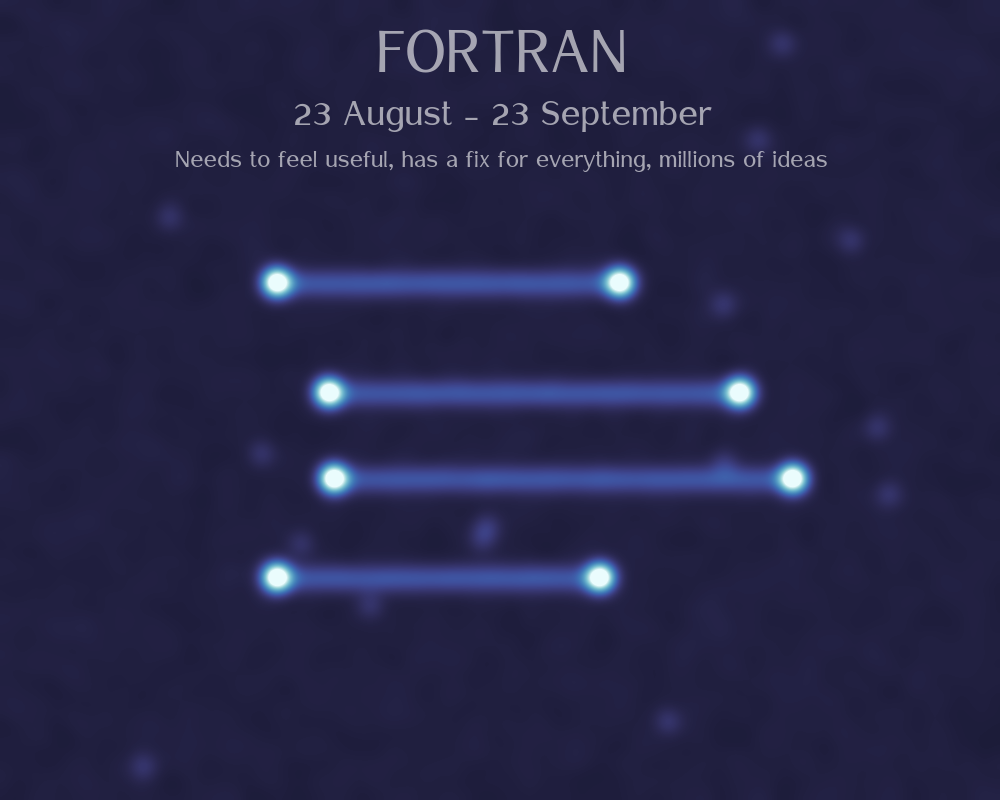

In [9]:
# Constellation structure

sign1 = np.array([[277, 283], [621, 283]])
sign2 = np.array([[329, 393], [741, 393]])
sign3 = np.array([[334, 479], [794, 479]])
sign4 = np.array([[277, 578], [601, 578]])

# Render constellation
constellation = render_constellation([
    sign1, sign2, sign3, sign4
])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="FORTRAN", **text_kwargs)
plt.text(s="23 August - 23 September", **text2_kwargs)
plt.text(s="Needs to feel useful, has a fix for everything, millions of ideas", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("FORTRAN.png")
plt.show()

# Libra / Dynamic rupture simulation

<IPython.core.display.Javascript object>


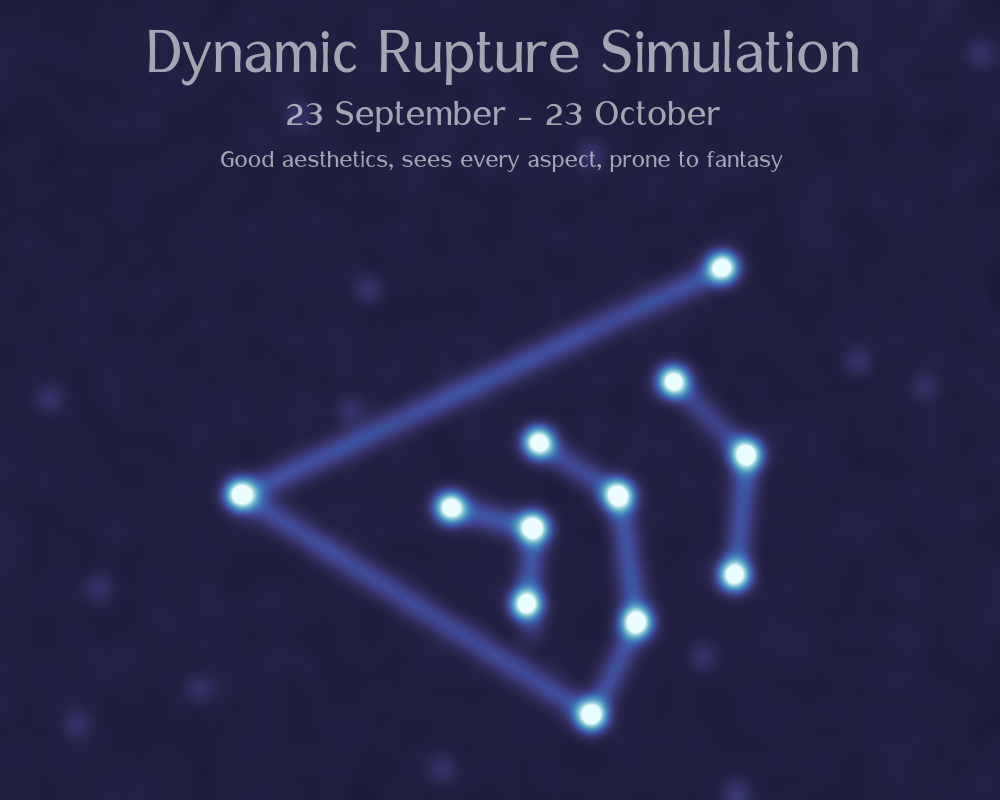

In [10]:
# Constellation structure

sign1 = np.array([
    [723, 268],
    [241, 495],
    [592, 716],
    [637, 623],
    [619, 496],
    [539, 443],
])

sign2 = np.array([
    [735, 576],
    [747, 455],
    [674, 382],
])

sign3 = np.array([
    [527, 605],
    [534, 528],
    [451, 508],
])

# Render constellation
constellation = render_constellation([
    sign1, sign2, sign3
])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Dynamic Rupture Simulation", **text_kwargs)
plt.text(s="23 September - 23 October", **text2_kwargs)
plt.text(s="Good aesthetics, sees every aspect, prone to fantasy", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("simulation.png")
plt.show()

# Scorpio / Ocean-Bottom Seismometer

<IPython.core.display.Javascript object>


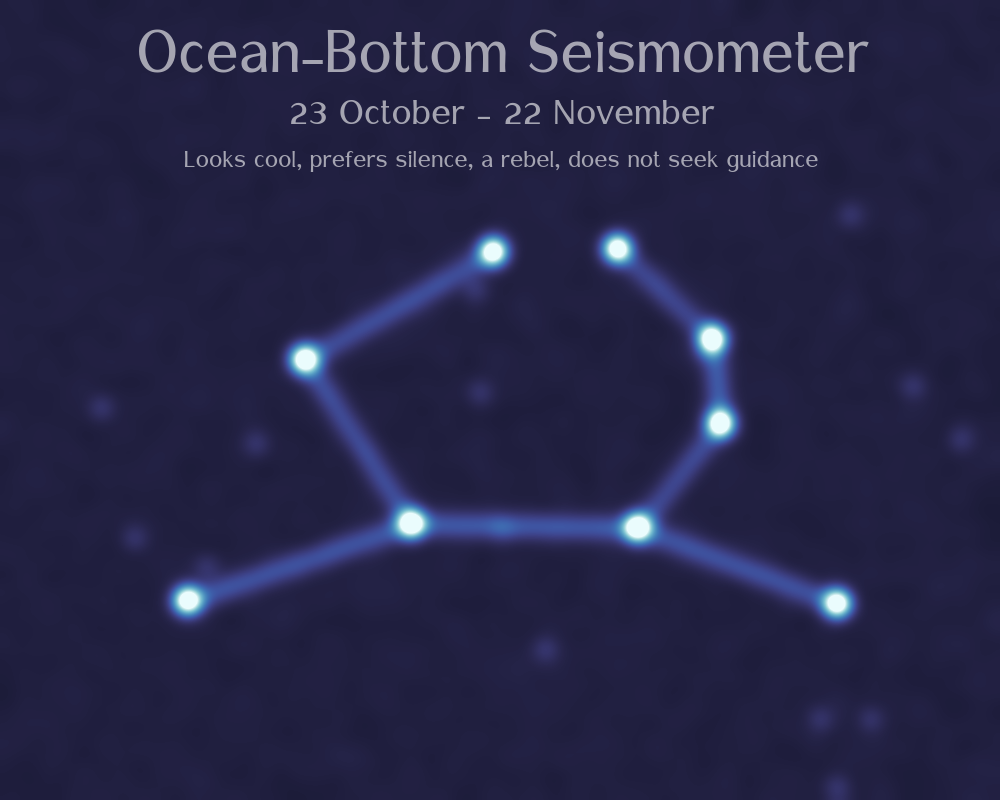

In [11]:
# Constellation structure

sign1 = np.array([
    [494, 252],
    [305, 360],
    [412, 524],
    [638, 528],
    [721, 424],
    [713, 339],
    [618, 249],
])

sign2 = np.array([
    [188, 601],
    [412, 524],
    [638, 528],
    [838, 604]
])

# Render constellation
constellation = render_constellation([sign1, sign2])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Ocean-Bottom Seismometer", **text_kwargs)
plt.text(s="23 October - 22 November", **text2_kwargs)
plt.text(s="Looks cool, prefers silence, a rebel, does not seek guidance", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("OBS.png")
plt.show()

# Sagittarius / Distributed Acoustic Sensing

<IPython.core.display.Javascript object>


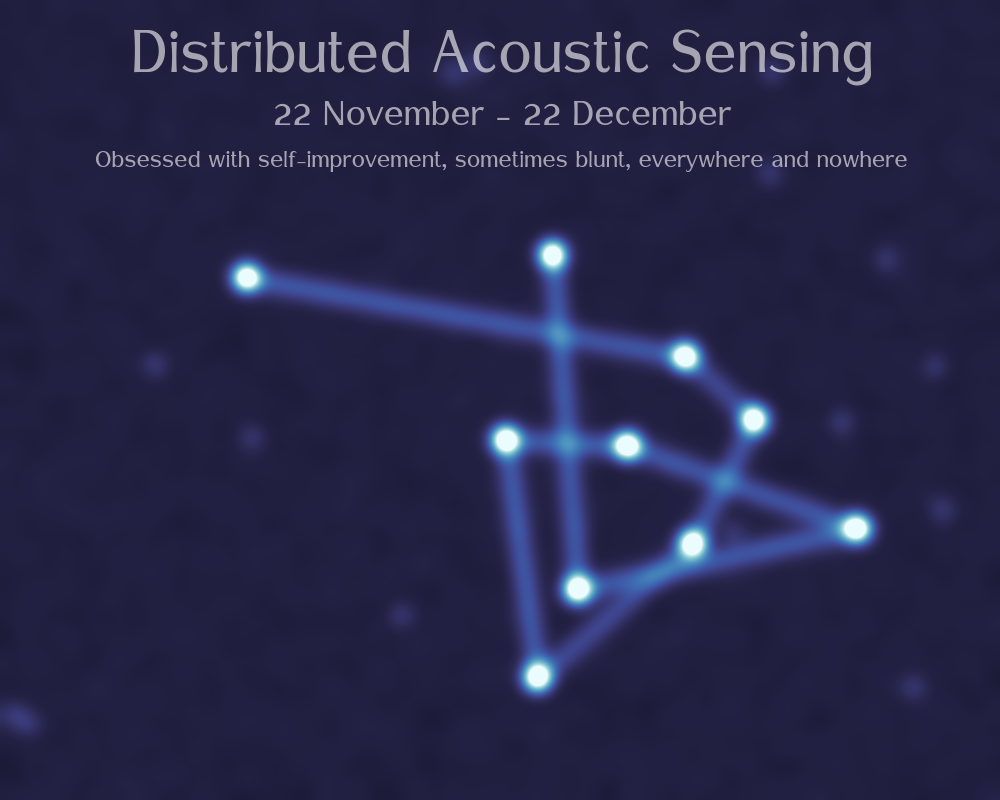

In [12]:
# Constellation structure
sign = np.array([
    [247, 278],
    [686, 357],
    [755, 420],
    [693, 544],
    [538, 678],
    [506, 440],
    [628, 446],
    [858, 529],
    [578, 590],
    [553, 255],
])

# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Distributed Acoustic Sensing", **text_kwargs)
plt.text(s="22 November - 22 December", **text2_kwargs)
plt.text(s="Obsessed with self-improvement, sometimes blunt, everywhere and nowhere", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("DAS.png")
plt.show()

# Capricorn / Accelerometer

<IPython.core.display.Javascript object>


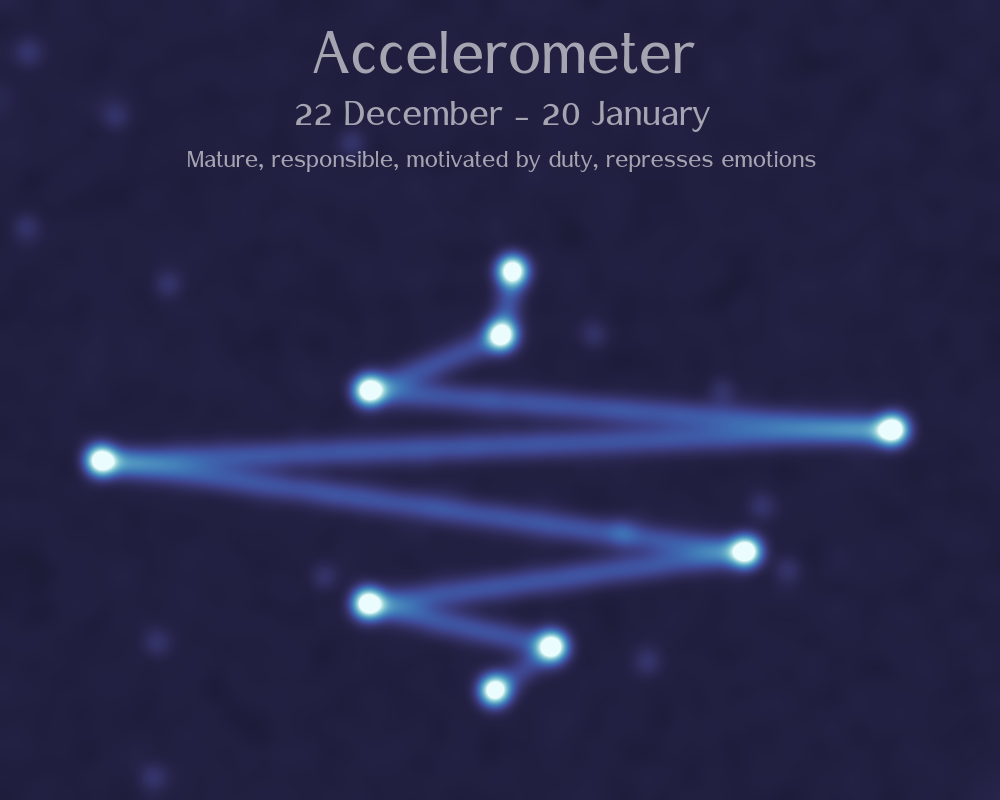

In [13]:
# Constellation structure
sign = np.array([
    [513, 271],
    [502, 336],
    [369, 391],
    [894, 430],
    [101, 461],
    [747, 552],
    [368, 604],
    [553, 647],
    [495, 691],
])

# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Accelerometer", **text_kwargs)
plt.text(s="22 December - 20 January", **text2_kwargs)
plt.text(s="Mature, responsible, motivated by duty, represses emotions", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("accelerometer.png")
plt.show()

# Aquarius / Magnetometer

<IPython.core.display.Javascript object>


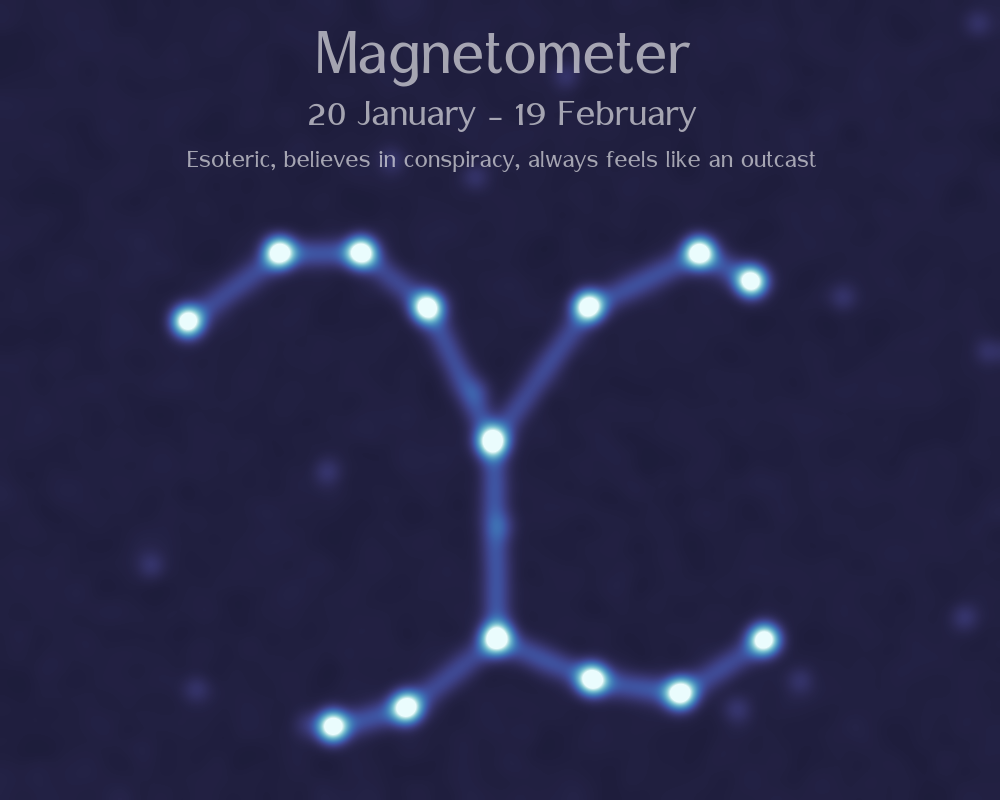

In [14]:
# Constellation structure
sign1 = np.array([
    [497, 639],
    [493, 442],
    [428, 308],
    [362, 253],
    [280, 253],
    [188, 322],
])

sign2 = np.array([
    [497, 639],
    [407, 708],
    [333, 727],
])

sign3 = np.array([
    [497, 639],
    [593, 680],
    [681, 694],
    [765, 640]
])

sign4 = np.array([
    [493, 442],
    [589, 307],
    [700, 253],
    [752, 282]
])

# Render constellation
constellation = render_constellation([sign1, sign2, sign3, sign4])

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s="Magnetometer", **text_kwargs)
plt.text(s="20 January - 19 February", **text2_kwargs)
plt.text(s="Esoteric, believes in conspiracy, always feels like an outcast", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("magnetometer.png")
plt.show()

# Pisces / b-value

<IPython.core.display.Javascript object>


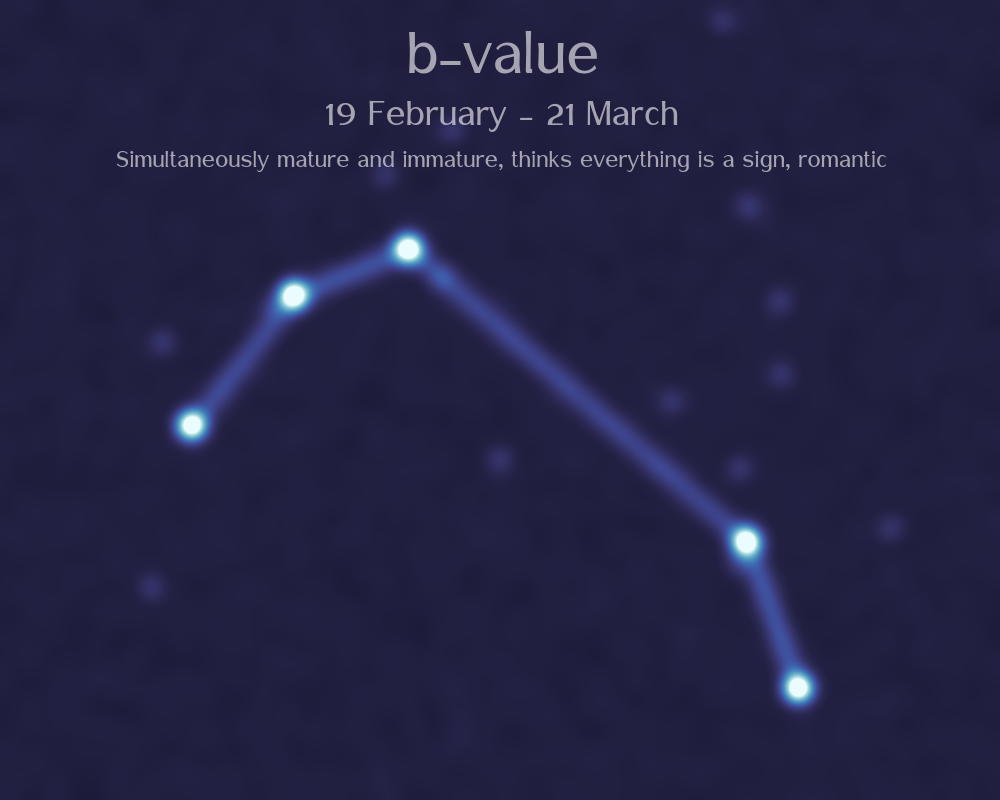

In [15]:
# Constellation structure
sign = np.array([
    [192, 426],
    [294, 296],
    [409, 249],
    [747, 542],
    [799, 689],
])


# Render constellation
constellation = render_constellation(sign)

# Show constellation
plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(constellation, **imshow_kwargs)
plt.text(s=r"b-value", **text_kwargs)
plt.text(s="19 February - 21 March", **text2_kwargs)
plt.text(s="Simultaneously mature and immature, thinks everything is a sign, romantic", **text3_kwargs)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("b-value.png")
plt.show()